In [1]:
# 필수 라이브러리
import pandas as pd
import numpy as np
import random
import tensorflow as tf

# 랜덤 시드 고정
SEED=12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)  
print("시드 고정: ", SEED)

시드 고정:  12


In [2]:
data = pd.read_csv('./wine_train.csv')
data.shape

(5497, 14)

In [3]:
data[:3]

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white


In [4]:
data['quality'][:10]

0    5
1    5
2    5
3    6
4    6
5    6
6    5
7    6
8    5
9    5
Name: quality, dtype: int64

In [5]:
data['quality'].value_counts()

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64

In [6]:
data.type[:10]

0    white
1      red
2    white
3    white
4    white
5    white
6    white
7    white
8    white
9    white
Name: type, dtype: object

In [7]:
data.type.value_counts()

white    4159
red      1338
Name: type, dtype: int64

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
#딥러닝 기본에서는 target이 명목형인 경우, dummy로 만들어줘야 한다.(one-hot인코딩) 

In [10]:
y_data = to_categorical(data['quality']-3)
#quality 분류 값이 0,1,2가 없기 때문에, 3을 빼줘서 필요없는 자리를 없애준다.
y_data[:3]

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [11]:
#train시킬 문제
X_data = data.loc[:,'fixed acidity':]
X_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...
5492,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white


In [12]:
X_data.shape

(5497, 12)

In [13]:
#
X_data['type'] = np.where(data['type'] == 'white', 1, 0).astype('float')
X_data['type'].value_counts()

1.0    4159
0.0    1338
Name: type, dtype: int64

In [14]:
# min_max스케일링
# 피처 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_data)
X_data_scaled = scaler.fit_transform(X_data)

In [15]:
X_data_scaled

array([[0.14876033, 0.41      , 0.03614458, ..., 0.12359551, 0.31884058,
        1.        ],
       [0.41322314, 0.35333333, 0.08433735, ..., 0.20786517, 0.2173913 ,
        0.        ],
       [0.33884298, 0.08666667, 0.23493976, ..., 0.16853933, 0.42028986,
        1.        ],
       ...,
       [0.33057851, 0.04666667, 0.20481928, ..., 0.28089888, 0.47826087,
        1.        ],
       [0.23140496, 0.22      , 0.18674699, ..., 0.10674157, 0.36231884,
        1.        ],
       [0.26446281, 0.18      , 0.10240964, ..., 0.07865169, 0.24637681,
        1.        ]])

In [16]:
# train/test data분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, y_data, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=100)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4397, 12) (4397, 7)
(1100, 12) (1100, 7)


# 신경망 모델을 만들어보자

In [17]:
# 모델생성
# 심층 신경망 모델
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [20]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim = 12))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(7, activation='softmax'))#가능성이 7개 (3~9).

In [21]:
##이 모델로 설정을 하겠다(compile)
model.compile(optimizer='adam', loss='categorical_crossentropy',#회귀에는 loss옵션값 다르게 줘야함!
             metrics=['acc','mae']
             )


In [23]:
#설정한 레이어들 요약해서 보기.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
 dense_4 (Dense)             (None, 7)                 77        
                                                                 
Total params: 12,407
Trainable params: 12,407
Non-trainable params: 0
_________________________________________________________________


In [25]:
#batch_size는 몇개 학습하고 업데이트하고 다시 학습할것인지 정하는 것
history = model.fit(X_train, y_train, epochs=200, batch_size=50, verbose=2)


Epoch 1/200
88/88 - 0s - loss: 0.7820 - acc: 0.6693 - mae: 0.1285 - 99ms/epoch - 1ms/step
Epoch 2/200
88/88 - 0s - loss: 0.7850 - acc: 0.6723 - mae: 0.1285 - 68ms/epoch - 771us/step
Epoch 3/200
88/88 - 0s - loss: 0.7802 - acc: 0.6695 - mae: 0.1277 - 70ms/epoch - 793us/step
Epoch 4/200
88/88 - 0s - loss: 0.7765 - acc: 0.6821 - mae: 0.1279 - 67ms/epoch - 759us/step
Epoch 5/200
88/88 - 0s - loss: 0.7826 - acc: 0.6739 - mae: 0.1274 - 66ms/epoch - 748us/step
Epoch 6/200
88/88 - 0s - loss: 0.7716 - acc: 0.6805 - mae: 0.1274 - 77ms/epoch - 873us/step
Epoch 7/200
88/88 - 0s - loss: 0.7723 - acc: 0.6741 - mae: 0.1270 - 70ms/epoch - 793us/step
Epoch 8/200
88/88 - 0s - loss: 0.7732 - acc: 0.6739 - mae: 0.1262 - 71ms/epoch - 805us/step
Epoch 9/200
88/88 - 0s - loss: 0.7647 - acc: 0.6739 - mae: 0.1265 - 71ms/epoch - 805us/step
Epoch 10/200
88/88 - 0s - loss: 0.7617 - acc: 0.6802 - mae: 0.1250 - 75ms/epoch - 850us/step
Epoch 11/200
88/88 - 0s - loss: 0.7616 - acc: 0.6864 - mae: 0.1255 - 74ms/epoch -

Epoch 90/200
88/88 - 0s - loss: 0.6185 - acc: 0.7478 - mae: 0.1039 - 75ms/epoch - 850us/step
Epoch 91/200
88/88 - 0s - loss: 0.6258 - acc: 0.7480 - mae: 0.1041 - 106ms/epoch - 1ms/step
Epoch 92/200
88/88 - 0s - loss: 0.6283 - acc: 0.7398 - mae: 0.1042 - 65ms/epoch - 737us/step
Epoch 93/200
88/88 - 0s - loss: 0.6368 - acc: 0.7355 - mae: 0.1049 - 69ms/epoch - 782us/step
Epoch 94/200
88/88 - 0s - loss: 0.6196 - acc: 0.7519 - mae: 0.1031 - 66ms/epoch - 748us/step
Epoch 95/200
88/88 - 0s - loss: 0.6272 - acc: 0.7394 - mae: 0.1037 - 70ms/epoch - 793us/step
Epoch 96/200
88/88 - 0s - loss: 0.6226 - acc: 0.7439 - mae: 0.1033 - 67ms/epoch - 759us/step
Epoch 97/200
88/88 - 0s - loss: 0.6346 - acc: 0.7387 - mae: 0.1048 - 100ms/epoch - 1ms/step
Epoch 98/200
88/88 - 0s - loss: 0.6292 - acc: 0.7451 - mae: 0.1038 - 105ms/epoch - 1ms/step
Epoch 99/200
88/88 - 0s - loss: 0.6102 - acc: 0.7489 - mae: 0.1020 - 92ms/epoch - 1ms/step
Epoch 100/200
88/88 - 0s - loss: 0.6133 - acc: 0.7564 - mae: 0.1018 - 102ms

Epoch 178/200
88/88 - 0s - loss: 0.5307 - acc: 0.7910 - mae: 0.0871 - 79ms/epoch - 895us/step
Epoch 179/200
88/88 - 0s - loss: 0.5019 - acc: 0.8026 - mae: 0.0848 - 79ms/epoch - 897us/step
Epoch 180/200
88/88 - 0s - loss: 0.5158 - acc: 0.7912 - mae: 0.0855 - 76ms/epoch - 861us/step
Epoch 181/200
88/88 - 0s - loss: 0.5088 - acc: 0.7967 - mae: 0.0854 - 83ms/epoch - 941us/step
Epoch 182/200
88/88 - 0s - loss: 0.5054 - acc: 0.7962 - mae: 0.0844 - 74ms/epoch - 839us/step
Epoch 183/200
88/88 - 0s - loss: 0.5171 - acc: 0.7896 - mae: 0.0855 - 75ms/epoch - 850us/step
Epoch 184/200
88/88 - 0s - loss: 0.5087 - acc: 0.7971 - mae: 0.0850 - 69ms/epoch - 782us/step
Epoch 185/200
88/88 - 0s - loss: 0.5166 - acc: 0.7917 - mae: 0.0859 - 75ms/epoch - 850us/step
Epoch 186/200
88/88 - 0s - loss: 0.5226 - acc: 0.7846 - mae: 0.0866 - 77ms/epoch - 873us/step
Epoch 187/200
88/88 - 0s - loss: 0.4994 - acc: 0.8035 - mae: 0.0841 - 74ms/epoch - 839us/step
Epoch 188/200
88/88 - 0s - loss: 0.5049 - acc: 0.7983 - mae:

## epochs를 401번 학습시킨 후(트레인 데이터의 학습 결과)
## loss: 0.4859 - acc: 0.8030 - mae: 0.0818 
#
## 테스트 데이터의 학습 결과를 비교해보자.
## acc: train< test 이 되어야한다.(반대가 되면 오버피팅)


In [27]:
test_result = model.evaluate(X_test, y_test)
test_result

35/35 [==============================] - 0s 1ms/step - loss: 1.6139 - acc: 0.5536 - mae: 0.1379


[1.6139088869094849, 0.553636372089386, 0.13789838552474976]

## overfitting이 되었음!
## trian=>loss: 0.4859 - acc: 0.8030 - mae: 0.0818
## test=> loss: 1.6139 - acc: 0.5536 - mae: 0.1379
## loss, mae는 적을수록 좋다
## acc는 클수록 좋다.

In [28]:
## 다중분류에서는 predict를 할 때 각 항목이 될 가능성을 계산해준다.
y_pred = model.predict(X_test)
y_pred[0]
#3이 될 확률: 7.9259272e-14(소수점14자리)

array([7.9259272e-14, 6.9605153e-07, 9.9307357e-04, 4.0799016e-03,
       9.8735285e-01, 7.5735170e-03, 2.5846209e-12], dtype=float32)

In [31]:
#몇번째가 가장 될 확률이 높은지 찾아보자(argmax함수사용)
y_pred0_index = np.argmax(y_pred[0])
# 아까 빼주었던 3을 더해 원래 값을 구해보자.
y_pred0_index + 3

7

In [32]:
y_test[0][5:]

array([1., 0.], dtype=float32)

In [33]:
len(y_pred)

1100

In [35]:
y_pred_test = np.argmax(y_pred,axis=-1) + 3#행 기준 최대값 찾기
y_pred_test

array([7, 6, 5, ..., 6, 7, 7], dtype=int64)

In [38]:
y_test_ = np.argmax(y_test, axis=-1)+3
y_test_

array([8, 5, 5, ..., 6, 7, 8], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print(accuracy_score(y_test_, y_pred_test))

0.5536363636363636


In [41]:
#대각선이 맞춘것 나머지가 혼동한 것 위에서부터 순서대로 3,4,5,...,9이다.
confusion_matrix(y_test_, y_pred_test)

array([[  0,   0,   1,   0,   0,   0,   0],
       [  1,   8,  19,  12,   1,   0,   0],
       [  1,   8, 242,  79,  16,   0,   0],
       [  1,   5, 152, 258,  77,   0,   0],
       [  0,   0,  15,  74,  95,   1,   0],
       [  0,   0,   2,   7,  16,   6,   0],
       [  0,   0,   0,   0,   3,   0,   0]], dtype=int64)

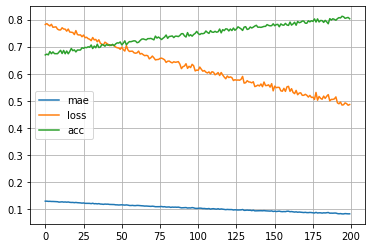

In [46]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.legend(['mae','loss','acc'])
plt.grid()
plt.show()